In [2]:
from models.quantization import quantize, binarize, QMode
import torch

# create a sample tensor
tensor = torch.tensor(range(-7, 8+1), dtype=torch.float32)

out = quantize(tensor, QMode.DET, 4)
out

tensor([-7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,
         7.,  8.])

In [7]:
from src.models.quantization import Binarize_ReSTE
from src.models.ternary_activation import Ternarize

tensor = torch.tensor([[1.1, 1.0, 0.9, 0.5, 0.2, 0, -1]], dtype=torch.float32)
t = torch.tensor(1.5, dtype=torch.float32)
o = torch.tensor(1.0, dtype=torch.float32)

Ternarize(tensor)

tensor([[ 1.,  1.,  1.,  0.,  0.,  0., -1.]])

In [4]:
import torch
from src.constants import DEVICE
from src.models.cnn import CNN, CNNLayerParams, CNNParams
from src.datasets.mnist_dataset import MNISTDataset
from src.models.quantization import ActivationFunc


cnn_params = CNNParams(
    input_channels=MNISTDataset.input_channels,
    input_dimensions=MNISTDataset.input_dimensions,
    input_bitwidth=32,
    output_height=MNISTDataset.output_size,
    fc_height=64,
    fc_layers=1,
    conv_layers=[
        CNNLayerParams(out_channels=8, kernel_size=3, stride=1, add_pooling=True),
        CNNLayerParams(out_channels=8, kernel_size=3, stride=1, add_pooling=True),
    ],
    fc_bitwidth=32,
    epochs=1,
    activation=ActivationFunc.TERNARIZE
)
cnn_model = CNN(cnn_params).to(DEVICE)
dummy_input = torch.zeros(1, 1, 28, 28).to(DEVICE)
output = cnn_model(dummy_input)
assert output.shape[0] == 1
assert output.shape[1] == 10
output

cnn_model.inspect_conv_layers()

Next layer shape: torch.Size([1, 8, 13, 13]), which equates to 1352 inputs
Next layer shape: torch.Size([1, 8, 5, 5]), which equates to 200 inputs
FC input size is 200


In [7]:
from src.models.cnn import evaluate_cnn_model

train, test = MNISTDataset.get_dataloaders(batch_size=128)

res = evaluate_cnn_model(cnn_params, train, test, verbose=2)
res

Train Epoch: 1 [0/60000] Loss: 2.3111
Train Epoch: 1 [640/60000] Loss: 1.9543
Train Epoch: 1 [1280/60000] Loss: 1.5101
Train Epoch: 1 [1920/60000] Loss: 1.1934
Train Epoch: 1 [2560/60000] Loss: 1.1797
Train Epoch: 1 [3200/60000] Loss: 1.3934
Train Epoch: 1 [3840/60000] Loss: 1.3126
Train Epoch: 1 [4480/60000] Loss: 1.1913
Train Epoch: 1 [5120/60000] Loss: 0.9193
Train Epoch: 1 [5760/60000] Loss: 0.9077
Train Epoch: 1 [6400/60000] Loss: 0.9259
Train Epoch: 1 [7040/60000] Loss: 0.9492
Train Epoch: 1 [7680/60000] Loss: 1.0634
Train Epoch: 1 [8320/60000] Loss: 0.8940
Train Epoch: 1 [8960/60000] Loss: 0.8795
Train Epoch: 1 [9600/60000] Loss: 0.8268
Train Epoch: 1 [10240/60000] Loss: 1.1490
Train Epoch: 1 [10880/60000] Loss: 0.8132
Train Epoch: 1 [11520/60000] Loss: 1.0447
Train Epoch: 1 [12160/60000] Loss: 1.1802
Train Epoch: 1 [12800/60000] Loss: 1.0849
Train Epoch: 1 [13440/60000] Loss: 1.1885
Train Epoch: 1 [14080/60000] Loss: 0.9222
Train Epoch: 1 [14720/60000] Loss: 1.1779
Train Epoch:

KeyboardInterrupt: 

In [5]:
from src.datasets.breast_cancer_dataset import BreastCancerDataset


train_loader, test_loader = BreastCancerDataset.get_dataloaders()

In [ ]:
from ucimlrepo import fetch_ucirepo


cardio = fetch_ucirepo(id=193)

In [ ]:
import pandas as pd
from sklearn import preprocessing

# Prepare fetures
cardio_X_df = cardio.data.features
cardio_df_X = cardio_X_df.astype("float32")

cardio_scalable_values = ["AC", "FM", "UC", "DL", "DS", "DP"]
scaler = preprocessing.MinMaxScaler()
cardio_df_X[cardio_scalable_values] = scaler.fit_transform(
    cardio_df_X[cardio_scalable_values]
)

cardio_X = preprocessing.normalize(cardio_df_X.values)

# Prepare targets
cardio_y_df = cardio.data.targets
cardio_class_y_df = cardio_y_df[["CLASS"]]

oh = preprocessing.OneHotEncoder(sparse_output=False)
new_features = oh.fit_transform(cardio_class_y_df[["CLASS"]])
new_features_names = oh.get_feature_names_out()

cardio_class_y = pd.DataFrame(new_features, columns=new_features_names).values


In [12]:
cardio_X_df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,64,62,126,2,0,120,137,121,73,1
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,130,68,198,6,1,141,136,140,12,0
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,130,68,198,5,1,141,135,138,13,0
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,117,53,170,11,0,137,134,137,13,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,117,53,170,9,0,137,136,138,11,1


In [16]:
cardio_df_X[0:5]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
0,120.0,0.000000,0.0,0.000000,0.0,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.315789,0.0,0.400000,0.2,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.157895,0.0,0.533333,0.2,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.157895,0.0,0.533333,0.2,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.368421,0.0,0.533333,0.0,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [6]:
from models.mlp import ModelParams, test_model, evaluate_model
from models.quantization import ActivationFunc, QMode
from src.datasets.cardio_dataset import CardioDataset
from src.datasets.vertebral_dataset import VertebralDataset

p = ModelParams(
    in_layer_height=VertebralDataset.input_size,
    in_bitwidth=8,
    out_height=VertebralDataset.output_size,
    hidden_height=64,
    hidden_bitwidth=8,
    model_layers=3,
    learning_rate=0.05,
    activation=ActivationFunc.RELU,
    epochs=25,
    dropout_rate=0.2,
    quantization_mode=QMode.DET,
)
train_loader, test_loader = VertebralDataset.get_dataloaders(batch_size=16)

relu = evaluate_model(p, train_loader, test_loader, times=5, verbose=0)

p.activation = ActivationFunc.BINARIZE
binary = evaluate_model(p, train_loader, test_loader, times=5, verbose=0)

p.activation = ActivationFunc.BINARIZE_RESTE
binary_reste = evaluate_model(p, train_loader, test_loader, times=5, verbose=0)

p.activation = ActivationFunc.TERNARIZE
ternary = evaluate_model(p, train_loader, test_loader, times=5, verbose=0)

relu, binary, binary_reste, ternary


({'max': 83.87096774193549,
  'mean': np.float64(81.61290322580645),
  'std': np.float64(2.413972507596092)},
 {'max': 87.09677419354838,
  'mean': np.float64(80.64516129032258),
  'std': np.float64(3.6779852422552826)},
 {'max': 83.87096774193549,
  'mean': np.float64(82.25806451612902),
  'std': np.float64(1.442624501612771)},
 {'max': 87.09677419354838,
  'mean': np.float64(80.96774193548387),
  'std': np.float64(3.592106040535497)})

ModelParams(in_layer_height=6, in_bitwidth=2, out_height=3, hidden_height=np.int64(4), hidden_bitwidth=2, model_layers=np.int64(2), activation=<ActivationFunc.BINARIZE: 'binarize'>, dropout_rate=0.0, learning_rate=0.0001, epochs=20, quantization_mode=<QMode.DET: 'det'>)
ModelParams(in_layer_height=6, in_bitwidth=32, out_height=3, hidden_height=np.int64(16), hidden_bitwidth=32, model_layers=np.int64(8), activation=<ActivationFunc.BINARIZE: 'binarize'>, dropout_rate=0.0, learning_rate=0.2, epochs=20, quantization_mode=<QMode.STOCH: 'stoch'>)
[2 4 0 0 0 0]
Objective values on min bounds:  [np.float64(82.25806451612902), 0.0, 0.0, 0.0, 0.0]
NAS params for min bounds:  {'layers_amount': np.int64(2), 'hidden_height': np.int64(4), 'input_bitwidth': 2, 'hidden_bitwidth': 2, 'learning_rate': 0.0001, 'quantization_mode': <QMode.DET: 'det'>}
[ 8 16  7  7 10  1]
Objective values on max bounds:  [np.float64(17.74193548387096), 100.0, 100.0, 100.0, 100.0]
NAS params for max bounds:  {'layers_amount'

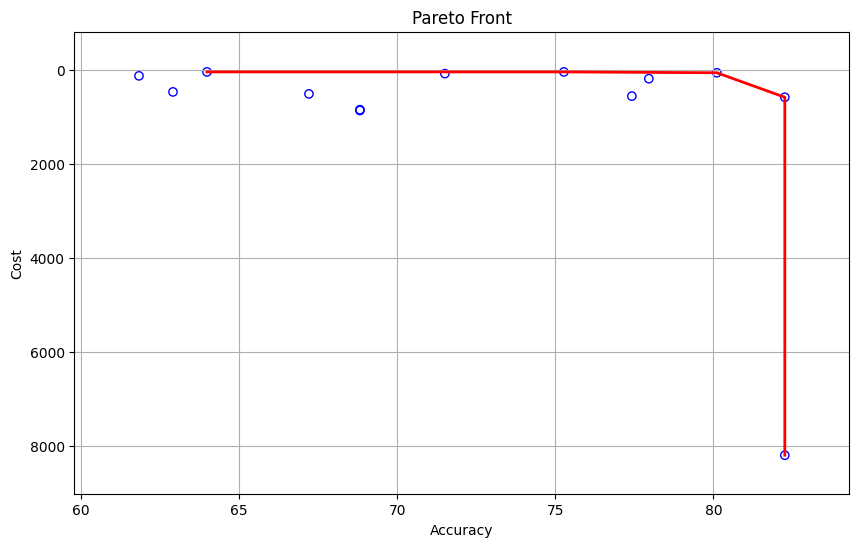

NASResult(res=<pymoo.core.result.Result object at 0x7f0fa8a4ac10>, all=    layers_amount  hidden_height  input_bitwidth  hidden_bitwidth  \
0               2              6              10                4   
1               6              6               7                2   
2               4             13               3                3   
3               6             10               3                2   
4               3              4               7               32   
5               2             14               2                5   
6               3              4               4                2   
7               3             11               2               10   
8               2              5               3                5   
9               2              5               4                3   
10              2              8              32               14   
11              5             10              14               32   
12              2             12

In [1]:
from datasets.vertebral_dataset import VertebralDataset
from nas.mlp_nas_problem import NASParams
from nas.tooling import run_NAS_pipeline


nas_params = NASParams(
    min_accuracy=50,
    amount_of_evaluations=3,
    population_size=60,
    population_offspring_count=24,
    epochs=10,
)
nas_res = run_NAS_pipeline(VertebralDataset, nas_params, n_gen=1, population_cache_file="vertebral_pf.csv")
nas_res


In [ ]:
nas_res.store_pf_population("vertebral_pf.csv")

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       40 |      6 |  0.000000E+00 |  0.000000E+00 |             - |             -
     2 |       56 |      7 |  0.000000E+00 |  0.000000E+00 |  0.1508234204 |             f
     3 |       72 |      6 |  0.000000E+00 |  0.000000E+00 |  4.0000000000 |         nadir
     4 |       88 |      7 |  0.000000E+00 |  0.000000E+00 |  2.0000000000 |         nadir
     5 |      104 |      8 |  0.000000E+00 |  0.000000E+00 |  1.666667E+01 |         nadir
     6 |      120 |      9 |  0.000000E+00 |  0.000000E+00 |  0.0757575758 |         ideal
     7 |      136 |      8 |  0.000000E+00 |  0.000000E+00 |  0.0571428571 |         ideal
Best accuracy: 87.09677419354838


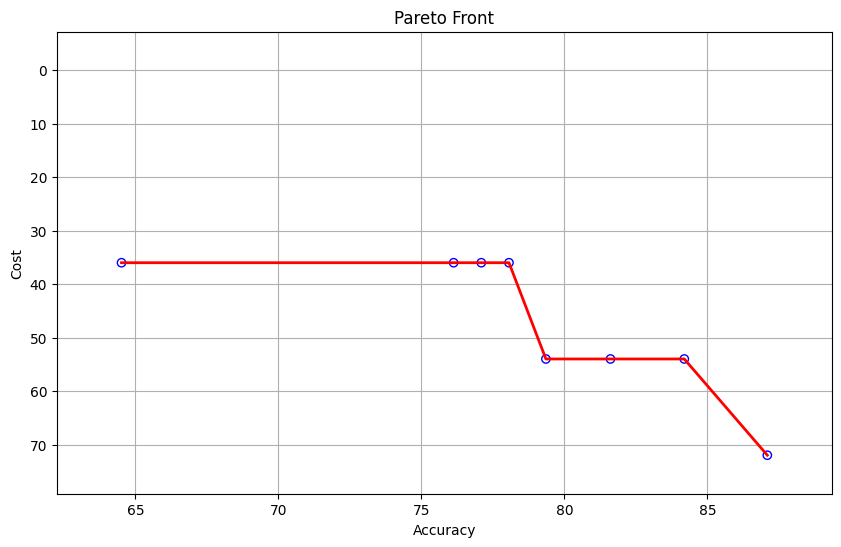

In [2]:
from constants import SEED

from nas.mlp_nas_problem import NASProblem, NASParams
from datasets.vertebral_dataset import VertebralDataset

from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.result import Result
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.repair.rounding import RoundingRepair
from pymoo.operators.sampling.rnd import IntegerRandomSampling
from pymoo.optimize import minimize
from pymoo.termination import get_termination

from src.nas.tooling import get_population_df, train_pf


nas_params = NASParams(
    min_accuracy=30,
    amount_of_evaluations=5,
    population_size=40,
    population_offspring_count=16,
    epochs=10,
)
problem = NASProblem(VertebralDataset, nas_params)

algorithm = NSGA2(
    pop_size=nas_params.population_size,
    n_offsprings=nas_params.population_offspring_count,
    sampling=IntegerRandomSampling(),
    crossover=SBX(prob=0.9, eta=15, repair=RoundingRepair()),
    mutation=PM(eta=20, repair=RoundingRepair()),
)

termination = get_termination("n_gen", 7)
res = minimize(
    problem,
    algorithm,
    termination,
    seed=SEED,
    save_history=True,
    verbose=True,
)

problem.show_metadata()

population = get_population_df(problem, res)

# population["pareto_trained"] = train_pf(population["pareto"], VertebralDataset, 10)

In [4]:
population

{'all':    layers_amount  hidden_height  input_bitwidth  hidden_bitwidth  \
 0              2              3               2                2   
 1              2              2               2               32   
 2              2              2               2                2   
 3              2              4               3                3   
 4              2              2               2                3   
 5              2              2               4                2   
 6              2              2               3                3   
 7              2              2               3                2   
 
    learning_rate quantization_mode   accuracy  cost  
 0           0.01       QMode.STOCH  78.064516    36  
 1           0.10       QMode.STOCH  77.096774    36  
 2           0.05       QMode.STOCH  64.516129    36  
 3           0.10       QMode.STOCH  84.193548    54  
 4           0.01       QMode.STOCH  76.129032    36  
 5           0.05       QMode.STOCH  87.

In [33]:
res.history

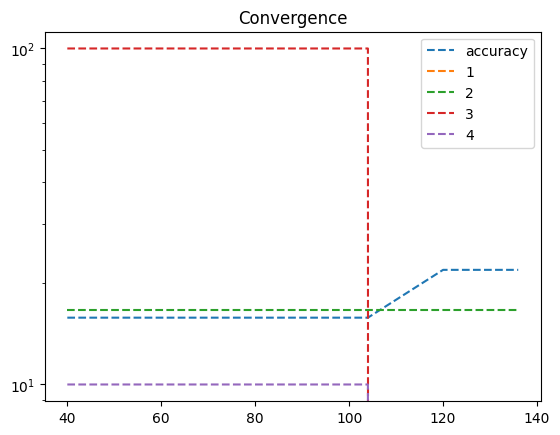

In [3]:
import numpy as np
import matplotlib.pyplot as plt

n_evals = np.array([e.evaluator.n_eval for e in res.history])
opt = np.array([e.opt[0].F for e in res.history])

for idx, obj_name in enumerate(["accuracy", "1", "2", "3", "4"]):
    plt.plot(n_evals, opt[:, idx], "--", label=obj_name)

plt.legend()

plt.title("Convergence")
plt.yscale("log")
plt.show()

In [16]:
res.history[-1].off[0].X

array([2, 3, 0, 0, 5, 0])

In [29]:
pop = np.array([e.X for e in res.history[-1].off])
pop

array([[ 2,  3,  0,  0,  5,  0],
       [ 2,  4,  2,  0,  1,  0],
       [ 2,  2,  2,  1,  6,  0],
       [ 2,  2,  0,  1,  6,  0],
       [ 2,  2,  0,  0,  1,  0],
       [ 5,  2,  0,  4,  9,  0],
       [ 6,  2,  0,  0,  8,  0],
       [ 2,  5,  2,  3,  9,  0],
       [ 2,  6,  2,  4,  5,  0],
       [ 2,  2,  0,  0,  7,  1],
       [ 2,  2,  2,  0,  8,  0],
       [ 2,  2,  1,  1,  9,  1],
       [ 2,  2,  0,  4,  1,  0],
       [ 7,  5,  0,  1,  7,  0],
       [ 3,  3,  0,  0,  6,  0],
       [ 2,  2,  1,  0, 10,  1]])

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       16 |      5 |  0.000000E+00 |  0.000000E+00 |             - |             -
     2 |       32 |      3 |  0.000000E+00 |  0.000000E+00 |  1.666667E+01 |         nadir
     3 |       48 |      6 |  0.000000E+00 |  0.000000E+00 |  1.0000000000 |         nadir
     4 |       64 |      6 |  0.000000E+00 |  0.000000E+00 |  1.0000000000 |         nadir
     5 |       80 |      8 |  0.000000E+00 |  0.000000E+00 |  0.0217974207 |             f
Best accuracy: 86.7741935483871


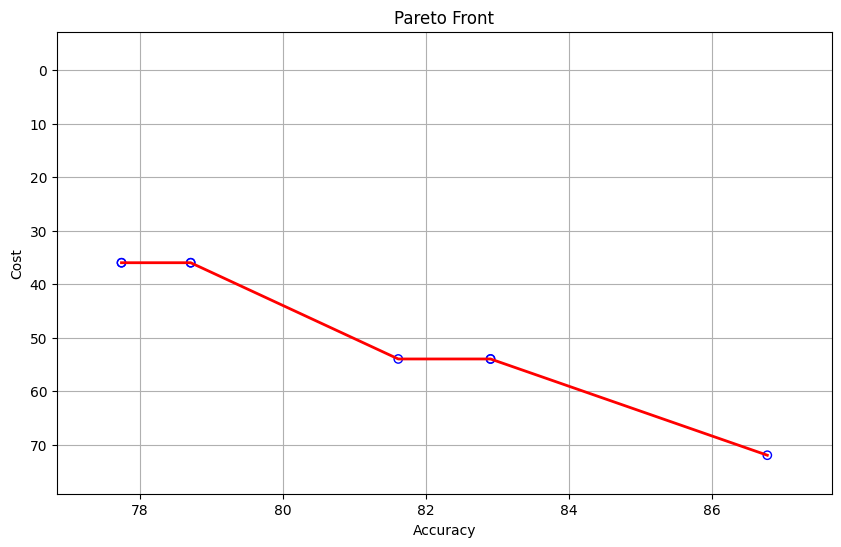

In [31]:

nas_params = NASParams(
    min_accuracy=30,
    amount_of_evaluations=5,
    population_size=40,
    population_offspring_count=16,
    epochs=10,
)
problem = NASProblem(VertebralDataset, nas_params)

algorithm = NSGA2(
    pop_size=nas_params.population_size,
    n_offsprings=nas_params.population_offspring_count,
    sampling=pop,
    crossover=SBX(prob=0.9, eta=15, repair=RoundingRepair()),
    mutation=PM(eta=20, repair=RoundingRepair()),
)

termination = get_termination("n_gen", 5)
res = minimize(
    problem,
    algorithm,
    termination,
    seed=SEED,
    save_history=True,
    verbose=True,
)

problem.show_metadata()

population = get_population_df(problem, res)

# population["pareto_trained"] = train_pf(population["pareto"], VertebralDataset, 10)